<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Chapter6_ML_2_01_scaling_data_5000_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.  Challenge: apply this to the spotify dataset

In a new notebook, try out the different scalers and transformers on the Spotify data and compare the results. Which scaler do you feel had the greatest impact? And, maybe, which scaler didn't help at all?

With the carefully chosen 10 songs, you might not see a massive effect. But soon we'll start working with a Spotify dataset of 5000 songs, where scaling will have a much larger impact.

Bonus, if you would like to learn more about scaling:

**SKLearn: Importance of Feature Scaling**

**SKLearn: Preprocessing data**

# 1. Import the Libary

In [3]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

# 2. Explore the data

In [4]:
# you need first download this sheet to local folder and then upload to google konto, then open the file in Google sheet.
# google sheet address
# https://docs.google.com/spreadsheets/d/1fnIo7Ozlr-o0Us4t6WSr81FzIgl03sG_ZptrNSqVDCM/edit#gid=1481626517
# ID of the Google Sheet for 5000 songs
sheet_id = "1fnIo7Ozlr-o0Us4t6WSr81FzIgl03sG_ZptrNSqVDCM"
# title of the google sheet
sheet_name = "1481626517"
# URL to download the Google Sheet as a CSV
# then change the sheet permission to anyone with the link has right to change or modify it.
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
songs_df = pd.read_csv(url, index_col='name')
# how to read CSV File without Unnamed Index Column using index_col=0 while reading CSV.
songs_df.head()

,Unnamed: 0,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,NaN,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,1,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,NaN,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",2,Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,NaN,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,3,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,NaN,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,4,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,NaN,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [23]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Se Eu Quiser Falar Com Deus to Ravel: Boléro, M. 81                                                                                                                                                           
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   floa

In [24]:
# Drop the 'artist', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html' - with intuition
songs_df = songs_df.drop(columns=['Unnamed: 0', 'artist', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html'])

In [25]:
songs_df.tail(10)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,
"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",0.1050,0.23100,7,-18.706,0.0516,0.673,0.0533,0.1570,0.0348,91.192
"Pines Of Rome, P. 141: 3. The Pines Of The Janiculum",0.1190,0.03380,4,-30.965,0.0424,0.938,0.8540,0.0806,0.0354,95.552
"Don Giovanni, K.527: Overture",0.3900,0.17400,2,-14.469,0.0373,0.869,0.8660,0.1120,0.3060,129.147
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",0.3860,0.12400,11,-22.869,0.0440,0.945,0.9170,0.0853,0.3190,142.307
A Flock Descends Into The Pentagonal Garden,0.0619,0.08300,4,-25.543,0.0452,0.935,0.6510,0.0860,0.0261,61.525
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,0.0473,0.917,0.7150,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,0.0442,0.855,0.4260,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,0.0434,0.951,0.9690,0.0772,0.0344,71.573
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,4,-29.443,0.0419,0.883,0.5050,0.1110,0.0591,67.109


In [26]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Se Eu Quiser Falar Com Deus to Ravel: Boléro, M. 81                                                                                                                                                           
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   speechiness       5235 non-null   float64
 5   acousticness      5235 non-null   float64
 6   instrumentalness  5235 non-null   float64
 7   liveness          5235 non-null   float64
 8   valence           5235 non-null   float64
 9   tempo             5235 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 449.9+ KB


Those columns have relative large values: 'key', 'loudness', 'tempo'. On the other hand, the value from 'speechiness' are really small. In this case, we need to scaling this four parameters individually first. Let's quickly create a heatmap where 'key' ('loudness', 'tempo', 'speechiness') is not involved and everything is scaled between 0-1. We'll compare it to a heatmap where 'key' is involved and therefore everything isn't in the range of 0-1.

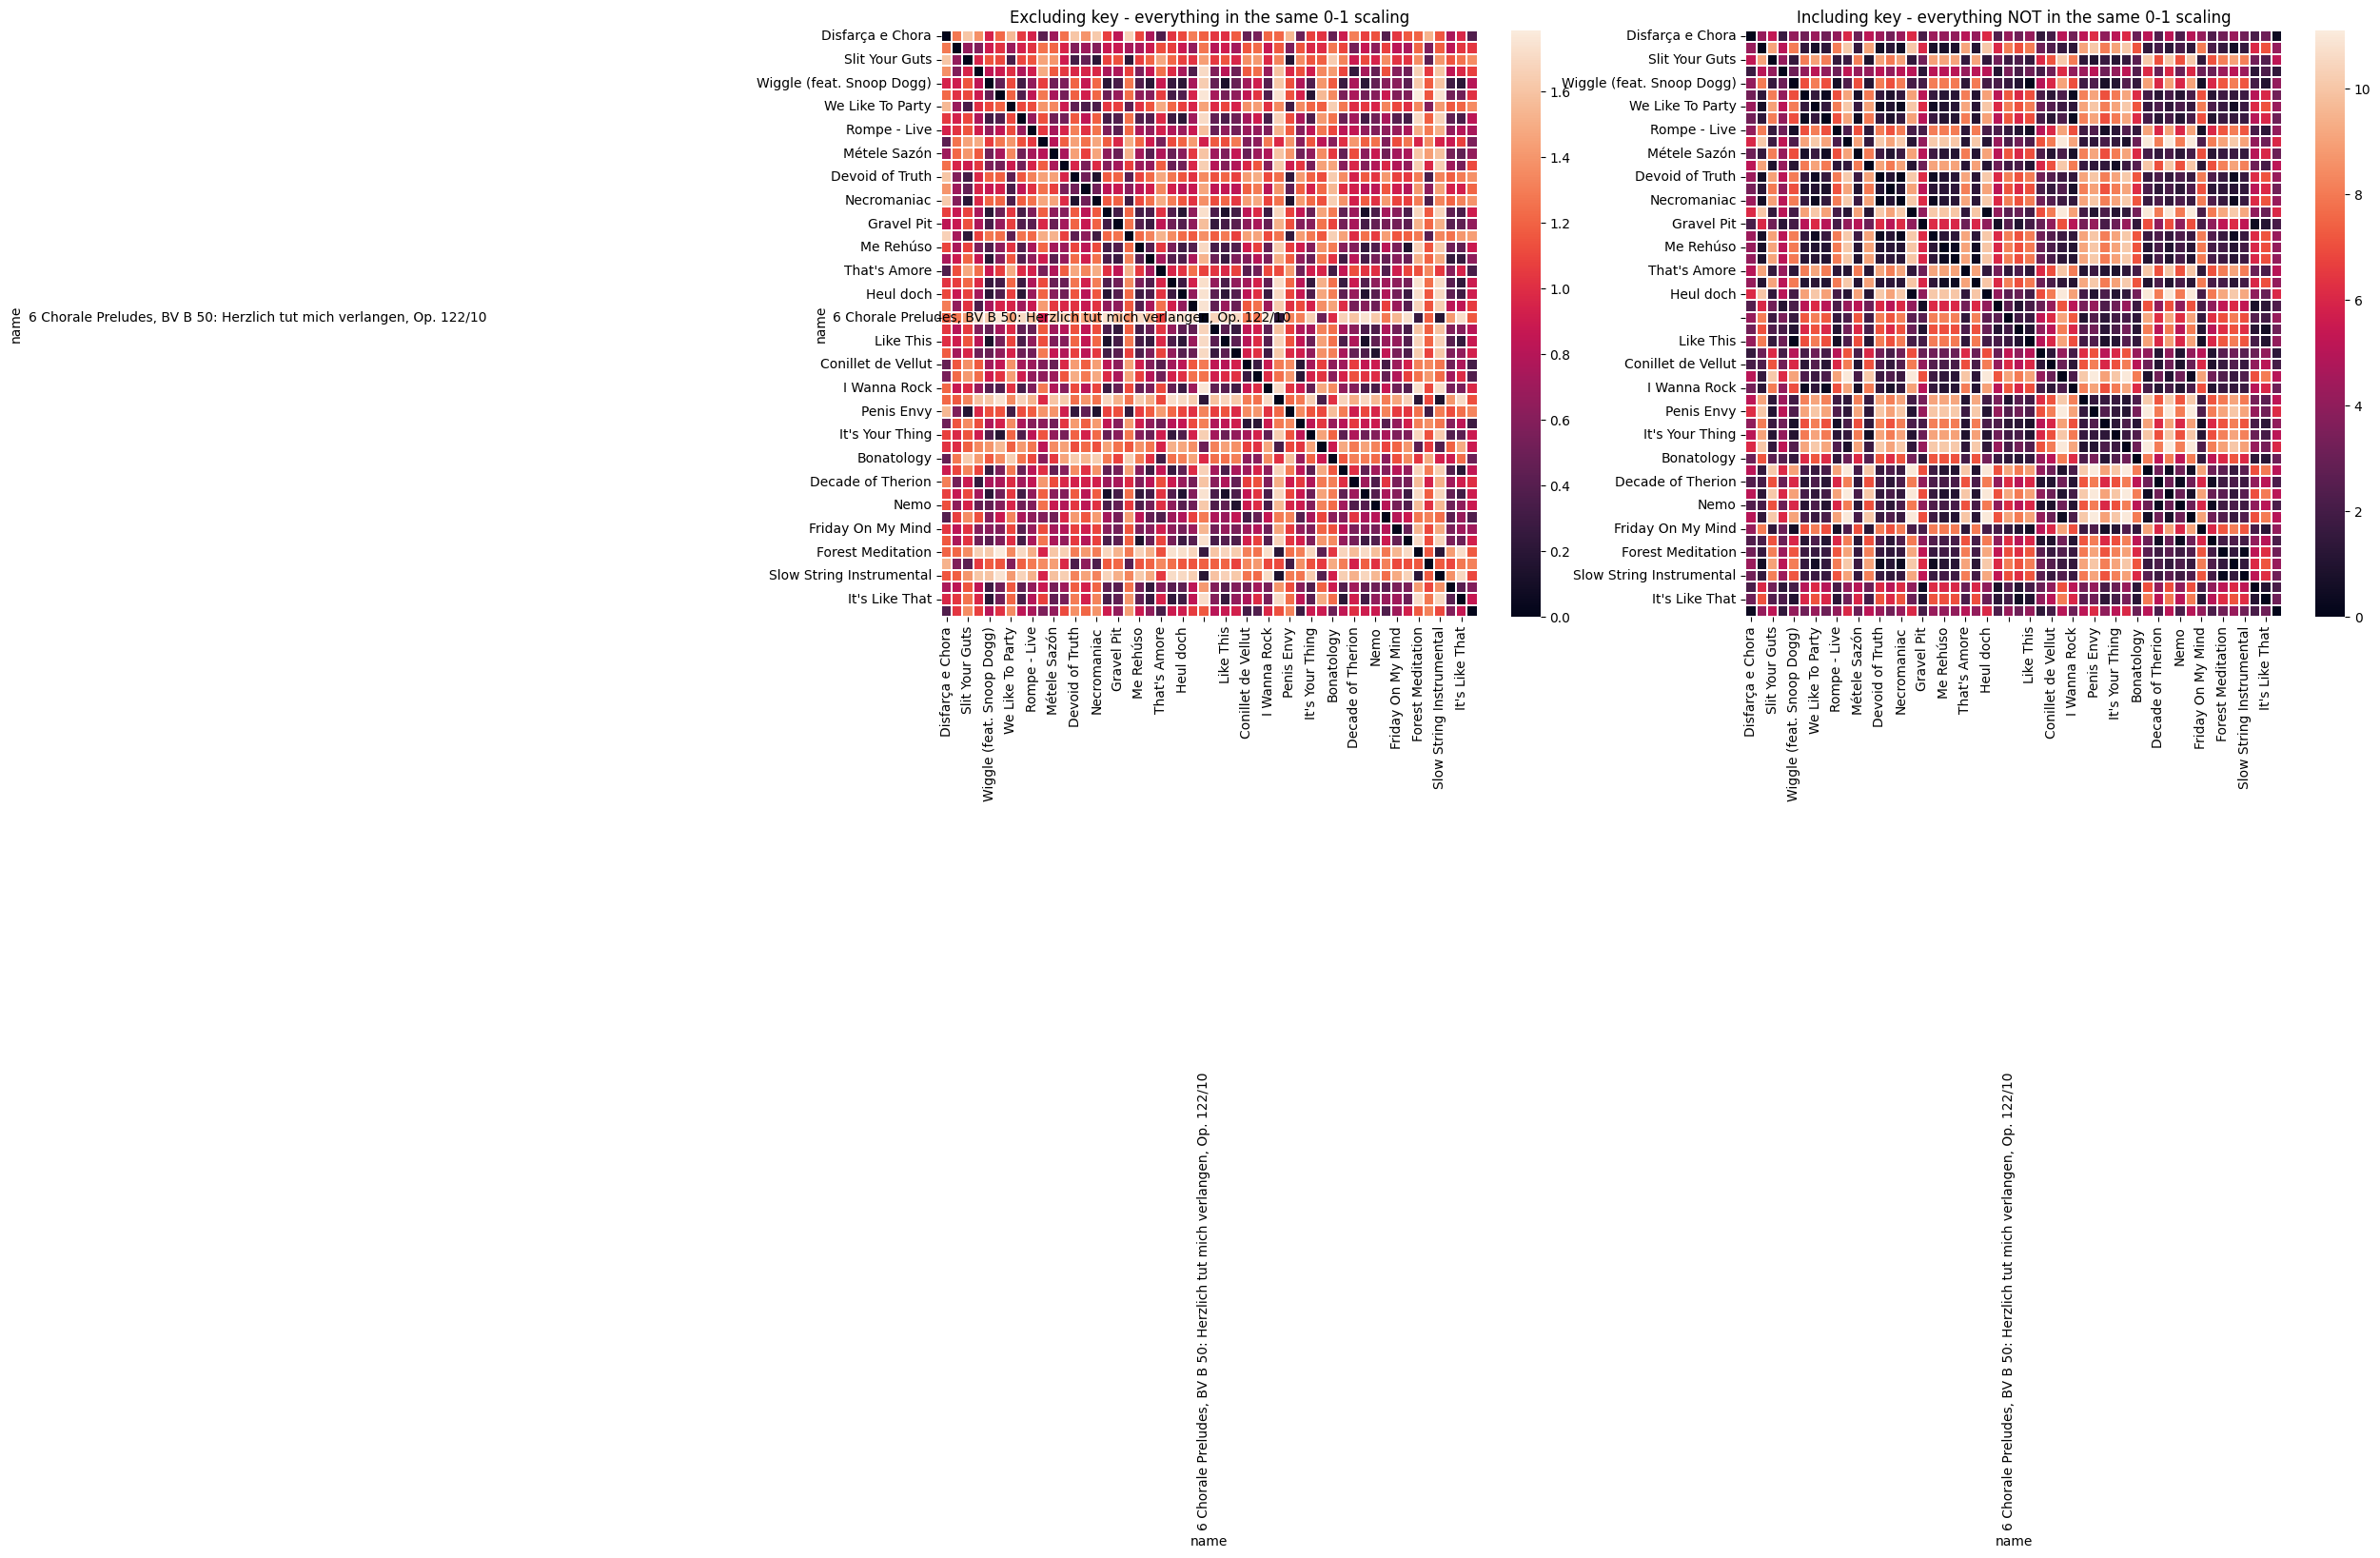

In [29]:
#making the Dataframe for the heatmap with 'key' - 'key' column not dropped
with_key_df_copy = songs_df.drop(columns=['loudness', 'tempo', 'speechiness']).copy()
#since the 5000 songs are too much, we chosse the random 100 rows to check
with_key_df = with_key_df_copy.sample(n=50, axis='rows')
# Making the DataFrame for the heatmap excluding 'key'
no_key_df = with_key_df.drop(columns=['key'])

no_key_distances_df = pd.DataFrame(pairwise_distances(no_key_df),
                                   index=no_key_df.index,
                                   columns=no_key_df.index)

# Making the DataFrame for the heatmap including key
with_key_distances_df = pd.DataFrame(pairwise_distances(with_key_df),
                                     index=with_key_df.index,
                                     columns=with_key_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(no_key_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_key_distances_df, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Excluding key - everything in the same 0-1 scaling')
ax2.set_title('Including key - everything NOT in the same 0-1 scaling')

plt.show()

Conclusion: The 'key' feature is dominating the distance calculation and obscuring the song preference. We need to scale the data so that all features have equal importance.

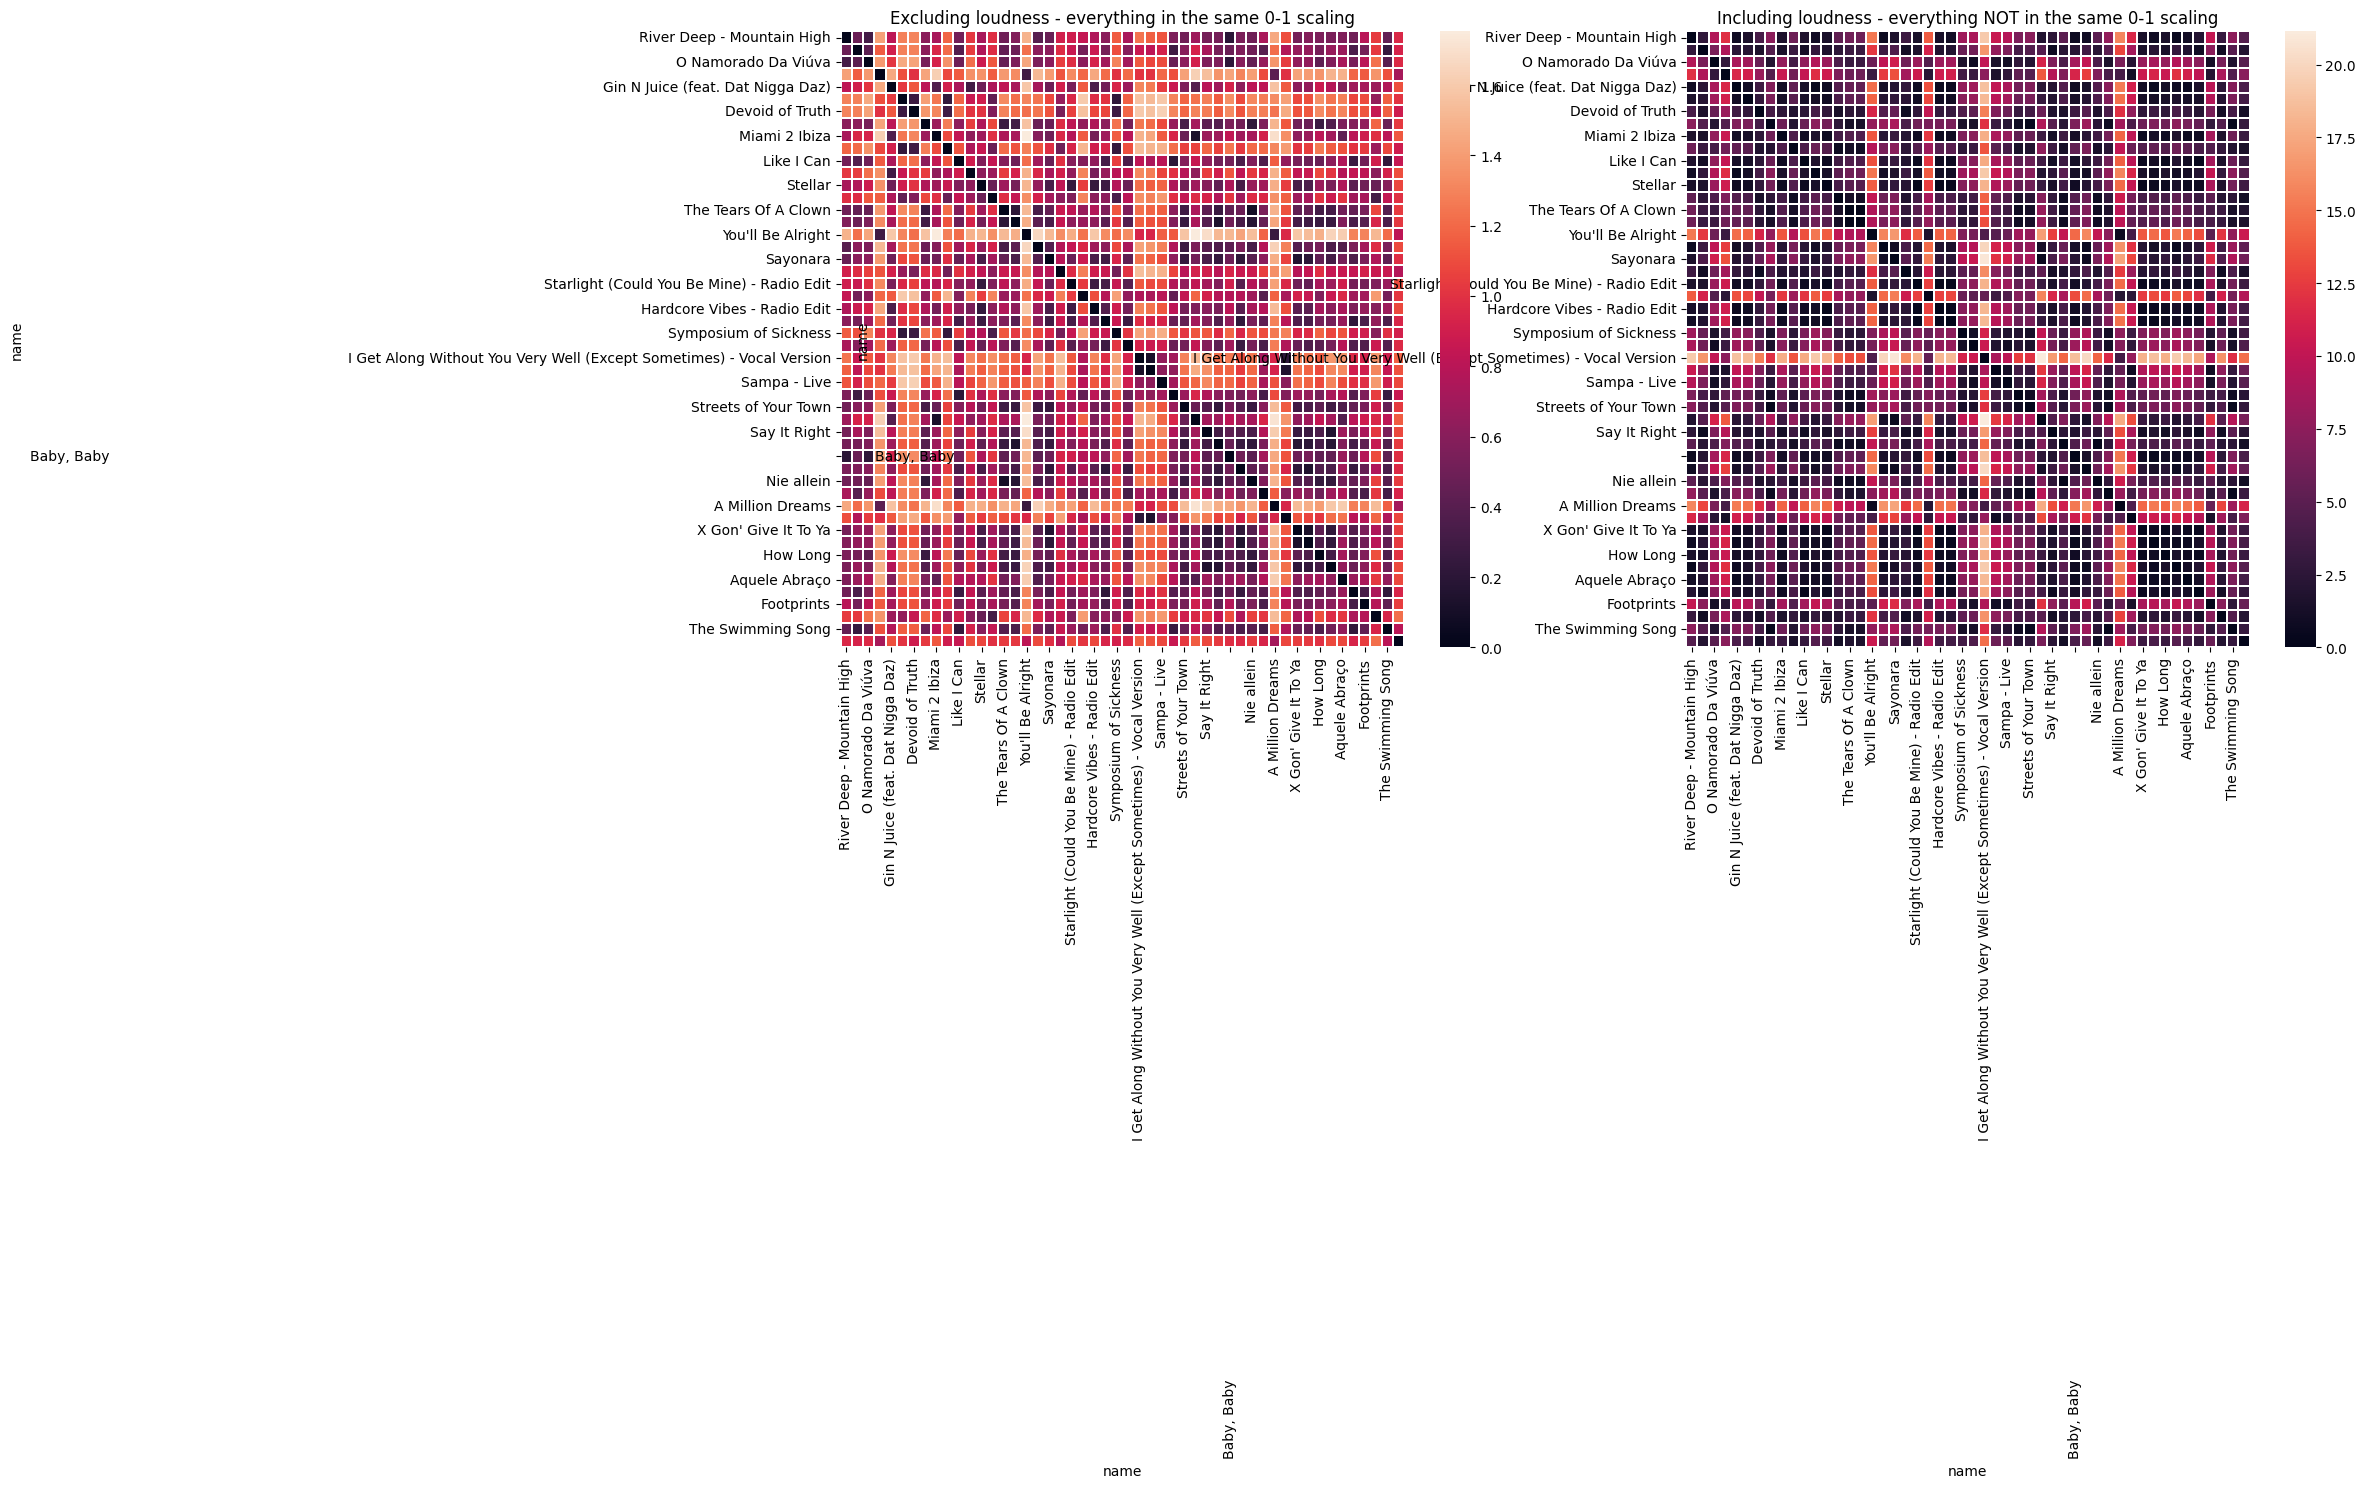

In [32]:
# now to see the influence from other factors: 'loudness', 'tempo', 'speechiness'
with_loudness_df_copy = songs_df.drop(columns=['key', 'tempo', 'speechiness']).copy()
with_loudness_df = with_loudness_df_copy.sample(n=50, axis='rows')
no_loudness_df = with_loudness_df.drop(columns=['loudness'])

no_loudness_distances_df = pd.DataFrame(pairwise_distances(no_loudness_df),
                                   index=no_loudness_df.index,
                                   columns=no_loudness_df.index)

# Making the DataFrame for the heatmap including loudness
with_loudness_distances_df = pd.DataFrame(pairwise_distances(with_loudness_df),
                                     index=with_loudness_df.index,
                                     columns=with_loudness_df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(no_loudness_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_loudness_distances_df, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Excluding loudness - everything in the same 0-1 scaling')
ax2.set_title('Including loudness - everything NOT in the same 0-1 scaling')

plt.show()

In [ ]:
# check the influence from the 'tempo'

In [ ]:
# check the influence from the 'speechiness'

# 3. How do you figure out what value to use for "K"? (no. of clustering)
-- ref. StatQuest: K-means clustering YT, finding the 'elbow plot' and there is a huge reduction in variation with k at the elbow point, but after that, the variation doesn't go down as quickly.

In [ ]:
# Elbow-Method for optimal value of 'k' in KMeans (Geeksforgeeks)
'''
As we know in the k-means clustering algorithm we randomly initialize k clusters
and we iteratively adjust these k clusters till these k-centroids riches in an
equilibrium state. However, the main thing we do before initializing these
clusters is that determine how many clusters we have to use.
'''



*   Step 1: Importing the required libraries



In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import random



* Step 2: Creating and Visualizing the data



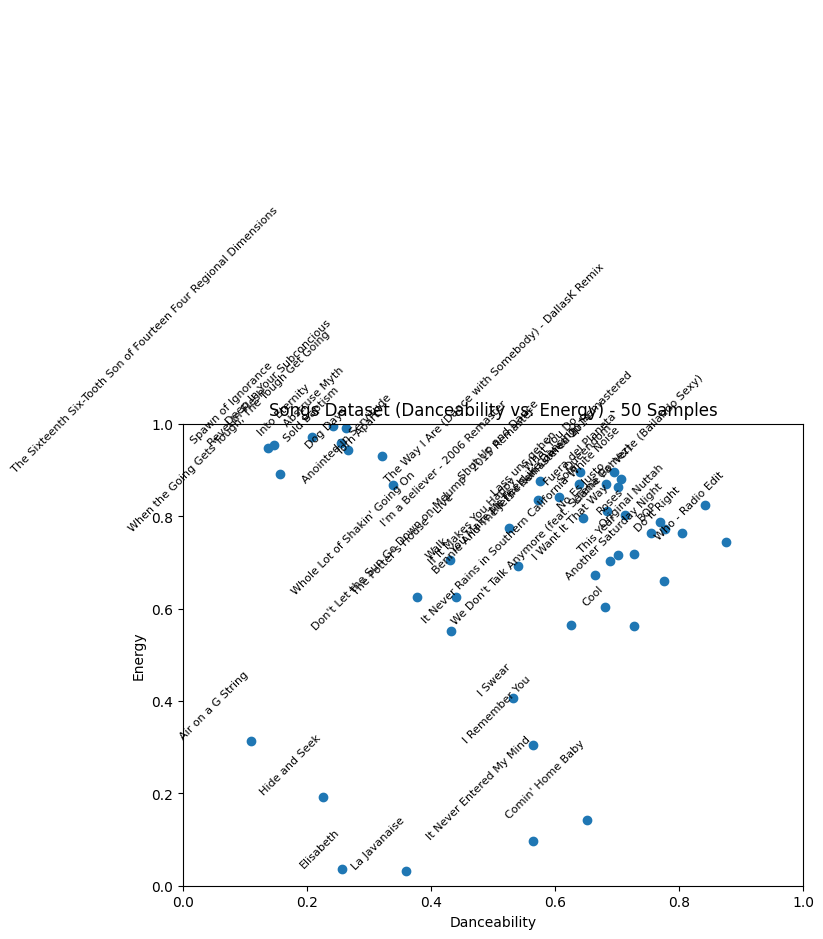

In [6]:
# Select two features for visualization (e.g., 'danceability' and 'energy')
# Select 50 random rows from the DataFrame
sampled_rows = songs_df.sample(n=50)

# Extract 'danceability' and 'energy' values from the sampled rows
x1 = sampled_rows['danceability']
x2 = sampled_rows['energy']

# Visualizing the data
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.xlim([0, 1])  # Set x-axis limits (0 to 1 for danceability)
plt.ylim([0, 1])  # Set y-axis limits (0 to 1 for energy)
plt.title('Songs Dataset (Danceability vs. Energy) - 50 Samples')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.scatter(x1, x2)

# Add labels (optional)
for i, name in enumerate(sampled_rows.index):
    plt.annotate(name, (x1[i], x2[i]), fontsize=8, ha='right', va='bottom', rotation=45)

plt.show()

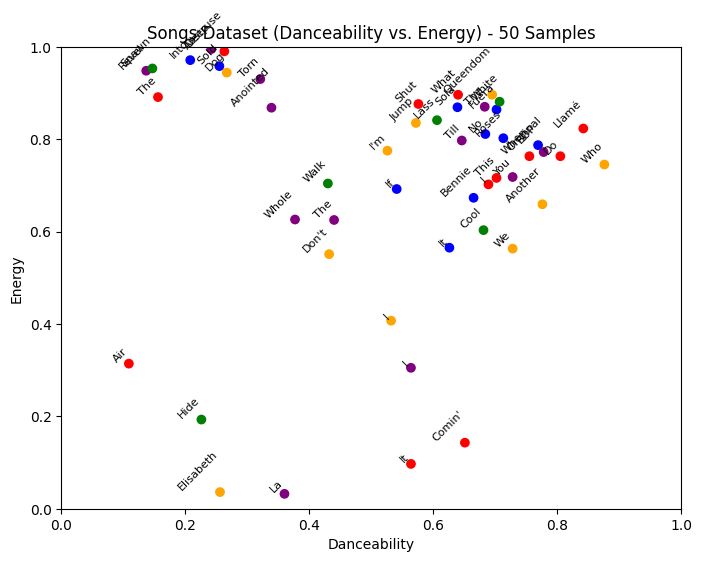

In [9]:
# as the name of each song are really long, it will clutter the plot.
# Get the first word of each song name
song_names = sampled_rows.index.str.split().str[0]

# Visualizing the data
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.xlim([0, 1])  # Set x-axis limits (0 to 1 for danceability)
plt.ylim([0, 1])  # Set y-axis limits (0 to 1 for energy)
plt.title('Songs Dataset (Danceability vs. Energy) - 50 Samples')
plt.xlabel('Danceability')
plt.ylabel('Energy')

# Create a list of random colors for each dot
colors = [random.choice(['red', 'green', 'blue', 'purple', 'orange']) for _ in range(50)]

# Plot the scatter with colors and labels
plt.scatter(x1, x2, c=colors)

# Add labels (first word of song name)
for i, name in enumerate(song_names):
    plt.annotate(name, (x1[i], x2[i]), fontsize=8, ha='right', va='bottom', rotation=45)

plt.show()



*  Step 3. Building the clustering model and calculating the values of the Distortion and Inertia:



In [10]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8



*  Step 4: Tabulating and Visualizing the Results, a) Using the different values od Distortion:



In [11]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.2917034652766875
2 : 0.2204490052704319
3 : 0.1406730564429245
4 : 0.11568411751993439
5 : 0.1023663857527993
6 : 0.08526704677642251
7 : 0.07477090124428239
8 : 0.06944143984897529
9 : 0.06349400310596094


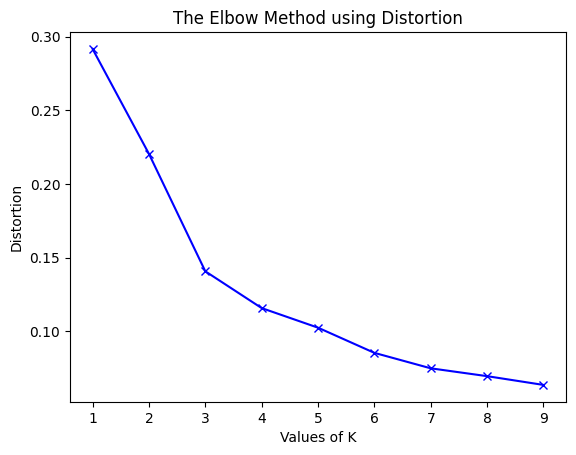

In [12]:
# Next we will plot the graph of 'K' versus WCSS
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.



* Step 5: Clustered Data Points For Different k Values



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


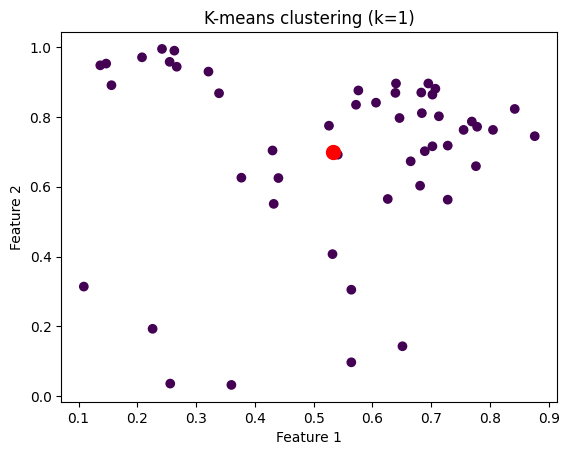

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


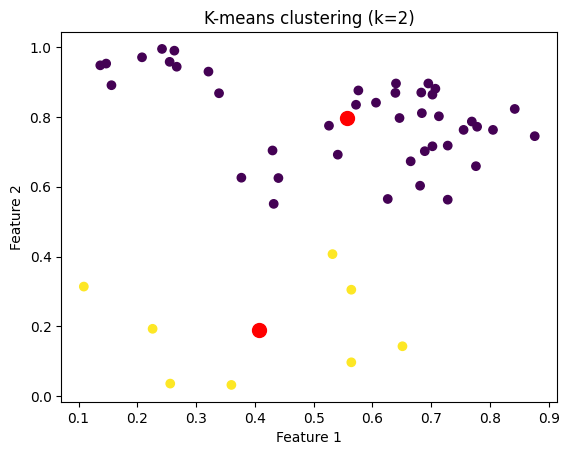

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


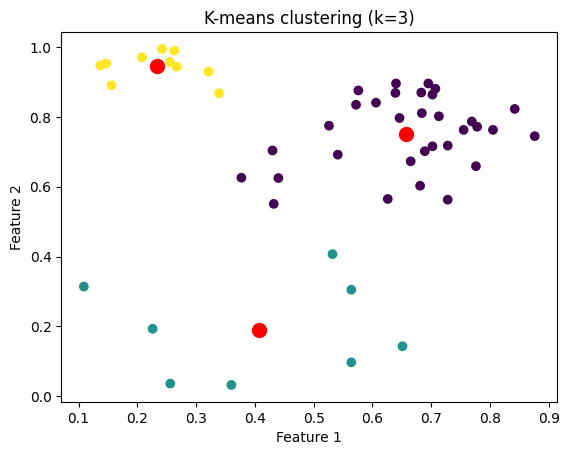

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


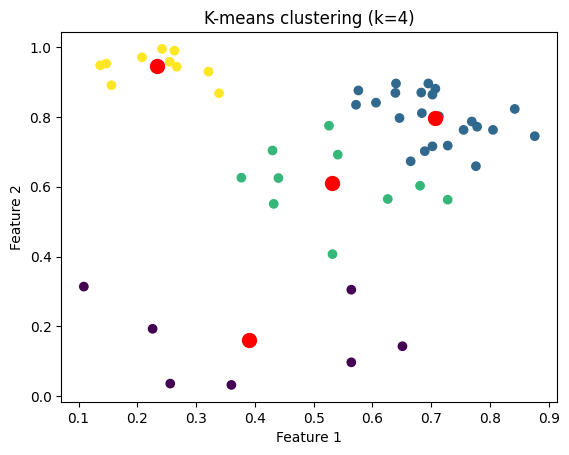

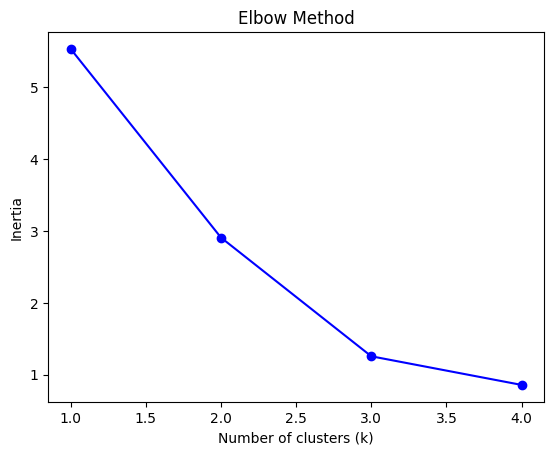

In [13]:
import matplotlib.pyplot as plt

# Create a range of values for k
k_range = range(1, 5)

# Initialize an empty list to
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

**Conclusion: the desired number of clusters for this songs_df is n_clusters = 3 in KMeans method .**

# 4.  Scalers - changing the range, but not the distribution